In [1]:
# Import dependencies 
import numpy as np
import pandas as pd
import re
import unicodedata
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read the spotify dataset
file_path = Path("../Last_Project/spotify-2023.csv")
spotify2023_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display sample data
spotify2023_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
#df info
spotify2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
#Columns names
spotify2023_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [5]:
#Rename columns 
spotify2023_df.rename(columns={'artist_count': 'contributing_artist_count', 
                               'in_spotify_charts':'spotify_chart_rank',
                               'in_apple_charts':'apple_chart_rank',
                               'in_deezer_charts':'deezer_chart_rank',
                               'in_shazam_charts':'shazam_chart_rank' },
                        inplace=True)
#Review changes made
spotify2023_df.head()

,track_name,artist(s)_name,contributing_artist_count,released_year,released_month,released_day,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [6]:
# Number of rows and columns
spotify2023_df.shape

(953, 24)

In [7]:
#Drop unnecessary columns
spotify2023_df.drop(columns=['released_day'], inplace=True)
spotify2023_df.head()

,track_name,artist(s)_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


In [8]:
#null values
spotify2023_df.isnull().sum()

track_name                    0
artist(s)_name                0
contributing_artist_count     0
released_year                 0
released_month                0
in_spotify_playlists          0
spotify_chart_rank            0
streams                       0
in_apple_playlists            0
apple_chart_rank              0
in_deezer_playlists           0
deezer_chart_rank             0
shazam_chart_rank            50
bpm                           0
key                          95
mode                          0
danceability_%                0
valence_%                     0
energy_%                      0
acousticness_%                0
instrumentalness_%            0
liveness_%                    0
speechiness_%                 0
dtype: int64

In [9]:
#Specific columns w/null values 
null_values = spotify2023_df.isnull().sum()
print(null_values[null_values > 0])

shazam_chart_rank    50
key                  95
dtype: int64


In [10]:
#Dropping rows with missing values
spotify2023_df.dropna(subset=['shazam_chart_rank', 'key'], inplace=True)

In [11]:
#confirm no null values
spotify2023_df.isnull().sum()

track_name                   0
artist(s)_name               0
contributing_artist_count    0
released_year                0
released_month               0
in_spotify_playlists         0
spotify_chart_rank           0
streams                      0
in_apple_playlists           0
apple_chart_rank             0
in_deezer_playlists          0
deezer_chart_rank            0
shazam_chart_rank            0
bpm                          0
key                          0
mode                         0
danceability_%               0
valence_%                    0
energy_%                     0
acousticness_%               0
instrumentalness_%           0
liveness_%                   0
speechiness_%                0
dtype: int64

In [12]:
#Determine the number of unique values in each column
spotify2023_df.nunique()

track_name                   811
artist(s)_name               571
contributing_artist_count      8
released_year                 46
released_month                12
in_spotify_playlists         756
spotify_chart_rank            76
streams                      814
in_apple_playlists           206
apple_chart_rank             163
in_deezer_playlists          292
deezer_chart_rank             31
shazam_chart_rank            187
bpm                          122
key                           11
mode                           2
danceability_%                71
valence_%                     94
energy_%                      78
acousticness_%                93
instrumentalness_%            36
liveness_%                    66
speechiness_%                 48
dtype: int64

In [13]:
#Convert object data types to numeric values and then to integers

spotify2023_df['streams'] = pd.to_numeric(spotify2023_df['streams'], errors='coerce')
spotify2023_df['streams'] = spotify2023_df['streams'].fillna(0).astype('int64')

spotify2023_df['in_deezer_playlists'] = pd.to_numeric(spotify2023_df['in_deezer_playlists'], errors='coerce')
spotify2023_df['in_deezer_playlists'] = spotify2023_df['in_deezer_playlists'].fillna(0).astype('int64')

spotify2023_df['shazam_chart_rank'] = pd.to_numeric(spotify2023_df['shazam_chart_rank'], errors='coerce')
spotify2023_df['shazam_chart_rank'] = spotify2023_df['shazam_chart_rank'].fillna(0).astype('int64')

#df info to check that change took place
spotify2023_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   track_name                 817 non-null    object
 1   artist(s)_name             817 non-null    object
 2   contributing_artist_count  817 non-null    int64 
 3   released_year              817 non-null    int64 
 4   released_month             817 non-null    int64 
 5   in_spotify_playlists       817 non-null    int64 
 6   spotify_chart_rank         817 non-null    int64 
 7   streams                    817 non-null    int64 
 8   in_apple_playlists         817 non-null    int64 
 9   apple_chart_rank           817 non-null    int64 
 10  in_deezer_playlists        817 non-null    int64 
 11  deezer_chart_rank          817 non-null    int64 
 12  shazam_chart_rank          817 non-null    int64 
 13  bpm                        817 non-null    int64 
 14  key            

In [14]:
# Function to remove accents and normalize text
def remove_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

# Define a regex pattern to remove special characters (keep only alphanumeric and space)
pattern = r'[^a-zA-Z0-9\s]'

# Clean 'track_name' and 'artist(s)_name' by removing special characters and accents
spotify2023_df['track_name'] = spotify2023_df['track_name'].str.replace(pattern, '', regex=True).apply(remove_accents).str.strip().str.lower()
spotify2023_df['artist(s)_name'] = spotify2023_df['artist(s)_name'].str.replace(pattern, '', regex=True).apply(remove_accents).str.strip().str.lower()

spotify2023_df.head()

,track_name,artist(s)_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,seven feat latto explicit ver,latto jung kook,2,2023,7,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
1,lala,myke towers,1,2023,3,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,olivia rodrigo,1,2023,6,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
3,cruel summer,taylor swift,1,2019,8,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
4,where she goes,bad bunny,1,2023,5,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


In [15]:
#check for duplicates
duplicates = spotify2023_df[spotify2023_df.duplicated()]
duplicates

,track_name,artist(s)_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [16]:
#basic statistics 
spotify2023_df.describe()

,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,8.170000e+02,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.567931,2018.457772,6.018360,4849.898409,11.722154,4.684117e+08,60.161567,49.473684,86.053856,2.451652,51.438188,122.565483,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,0.876211,10.829267,3.572554,7741.126455,18.617668,5.230635e+08,74.923594,49.570455,151.369515,5.397024,128.481703,28.174803,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,1.000000,1930.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,829.000000,0.000000,1.342558e+08,12.000000,6.000000,8.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,2040.000000,3.000000,2.637790e+08,32.000000,34.000000,28.000000,0.000000,2.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,4890.000000,16.000000,6.009768e+08,78.000000,84.000000,87.000000,2.000000,37.000000,141.000000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,964.000000,45.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [17]:
spotify2023_df.shape

(817, 23)

In [18]:
#writing spotify2023_df to a csv file
spotify2023_df.to_csv("Resources/cleaned_spotify_2023.csv",index=False)

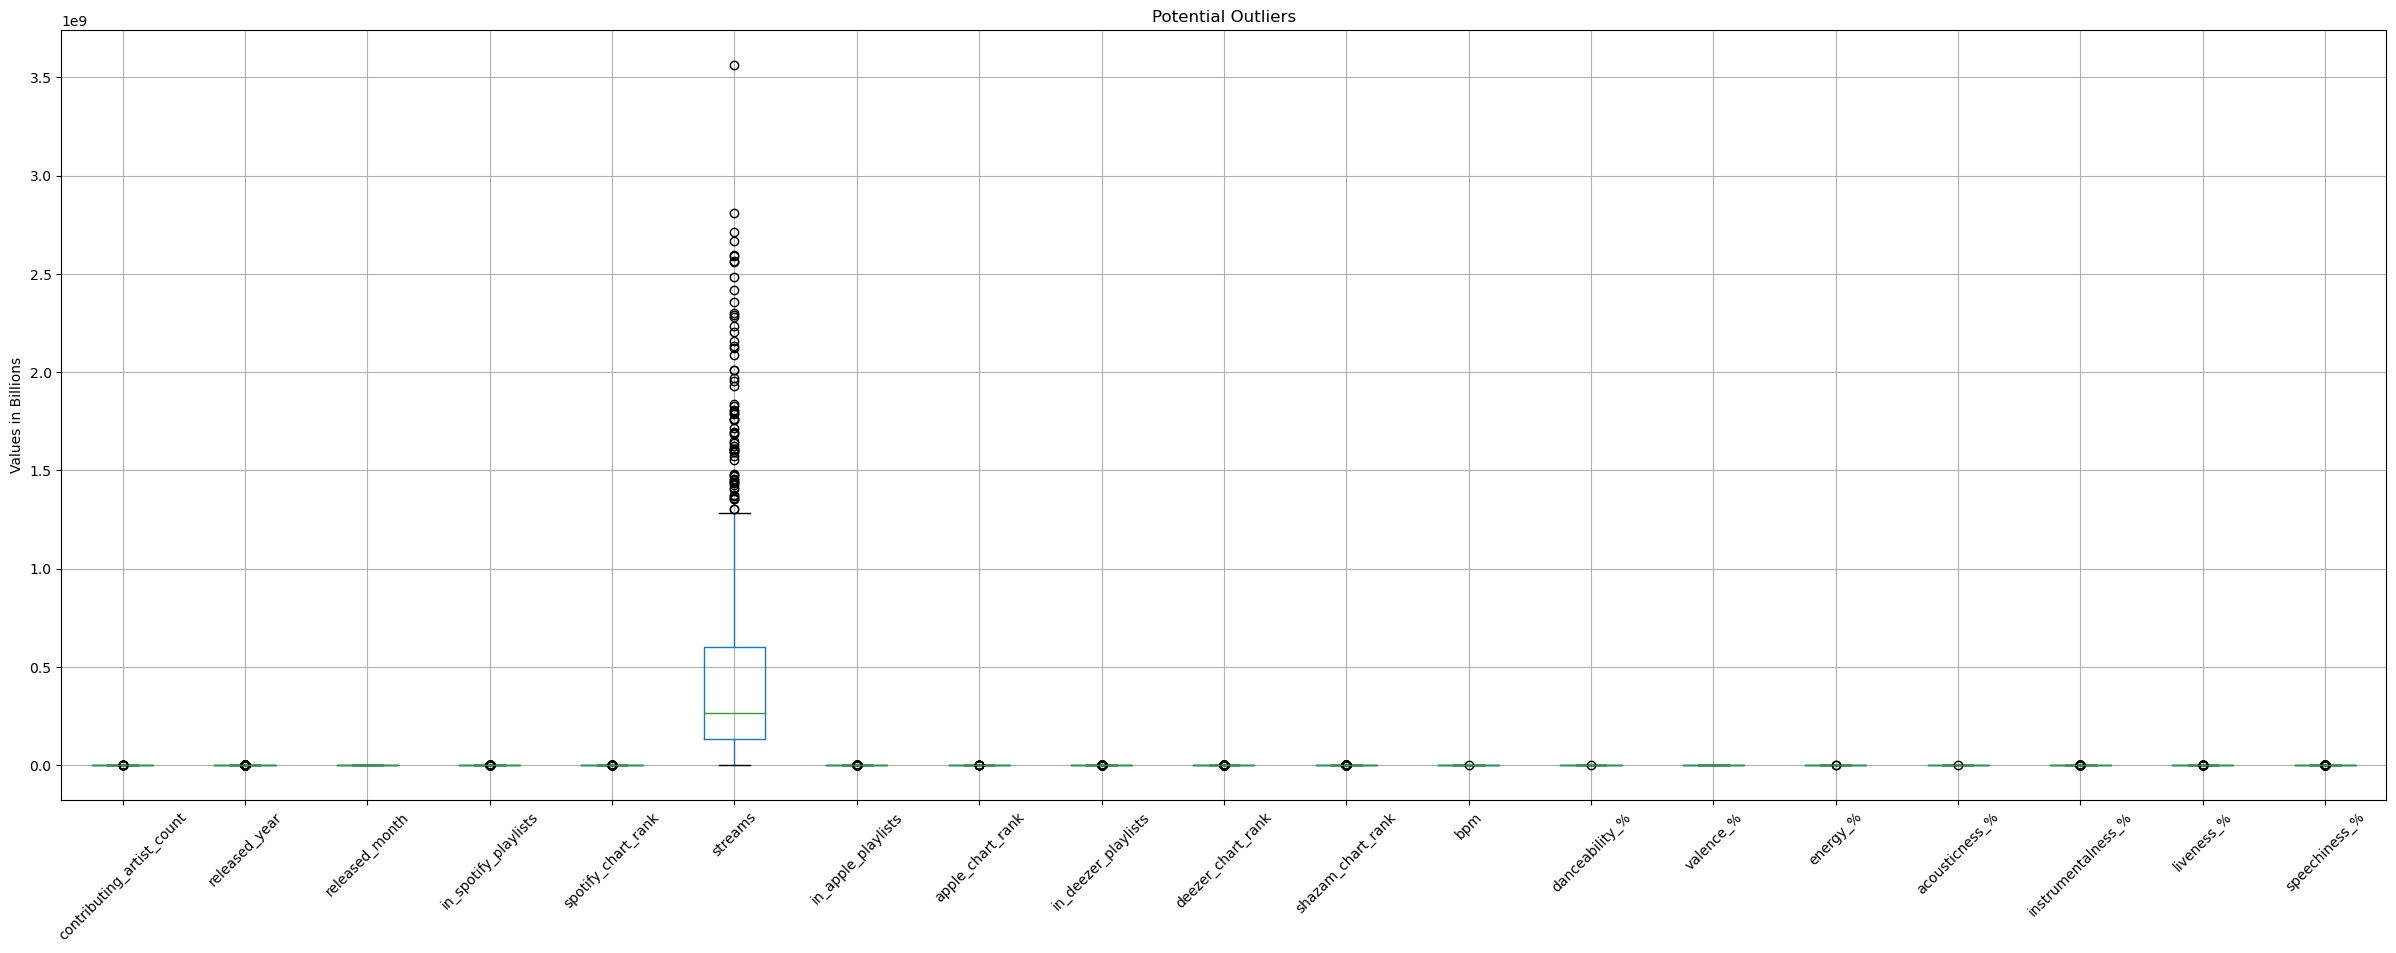

In [19]:
#check for potential outliers (noise) to potentionally optimize our algorithm

spotify2023_df.boxplot(column=['contributing_artist_count', 'released_year',
       'released_month','in_spotify_playlists',
       'spotify_chart_rank', 'streams', 'in_apple_playlists', 'apple_chart_rank',
       'in_deezer_playlists', 'deezer_chart_rank', 'shazam_chart_rank', 'bpm',
       'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],figsize=(30,10))

# Add title and axis labels
plt.title('Potential Outliers')
plt.ylabel('Values in Billions')

# Rotate x-axis labels
plt.xticks(rotation=45)

#show the plot
plt.show()

In [20]:
# Determine which data points are outside of the 1.5*IQR range

quartiles = np.quantile(spotify2023_df['streams'],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = spotify2023_df[(spotify2023_df['streams'] < lower_bound)|(spotify2023_df['streams'] > upper_bound)]
potential_outliers.head()

,track_name,artist(s)_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
37,blank space,taylor swift,1,2014,1,11434,53,1355959075,154,123,...,96,F,Major,75,57,68,9,0,13,6
41,sunflower spiderman into the spiderverse,post malone swae lee,2,2018,10,24094,78,2808096550,372,117,...,90,D,Major,76,91,50,54,0,7,5
47,die for you,the weeknd,1,2016,11,2483,59,1647990401,68,21,...,134,C#,Minor,59,51,52,9,0,15,7
48,starboy,the weeknd daft punk,2,2016,9,29536,79,2565529693,281,137,...,186,G,Major,68,49,59,16,0,13,28
65,yellow,chris molitor,1,1999,1,31358,43,1755214421,196,2,...,173,B,Major,43,28,66,0,0,23,3


In [21]:
#Stream descending sorting to view top 5 outliers 
potential_outliers['streams'].sort_values(ascending=False).head()


179    3562543890
41     2808096550
162    2713922350
84     2665343922
140    2594040133
Name: streams, dtype: int64

In [22]:
#lenght of potential outliers in the streams column
len(potential_outliers)

67

In [23]:
#df is being grouped by artists, counts the occurences on each artist's data, and sorts results by number of streams in descencing order
potential_outliers.groupby(['artist(s)_name']).count().sort_values(by='streams', ascending=False)

,track_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist(s)_name,,,,,,,,,,,,,,,,,,,,,
ed sheeran,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
eminem,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
linkin park,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
coldplay,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
bruno mars,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
adele,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
avicii,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
the weeknd,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
imagine dragons,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
